In [19]:
# Import necessary libraries
import pandas as pd
# Import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Import joblib to save the model
import joblib

from sklearn.metrics import silhouette_score



In [2]:
# Load the dataset
df = pd.read_csv('mall.csv')

# Display the first few rows of the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Select the features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Display the first few rows of the selected features
X.head()

Missing values in each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [5]:
# Initialize the scaler
scaler = StandardScaler()

# Standardize the features
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the standardized features
pd.DataFrame(X_scaled, columns=['Annual Income (k$)', 'Spending Score (1-100)']).head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


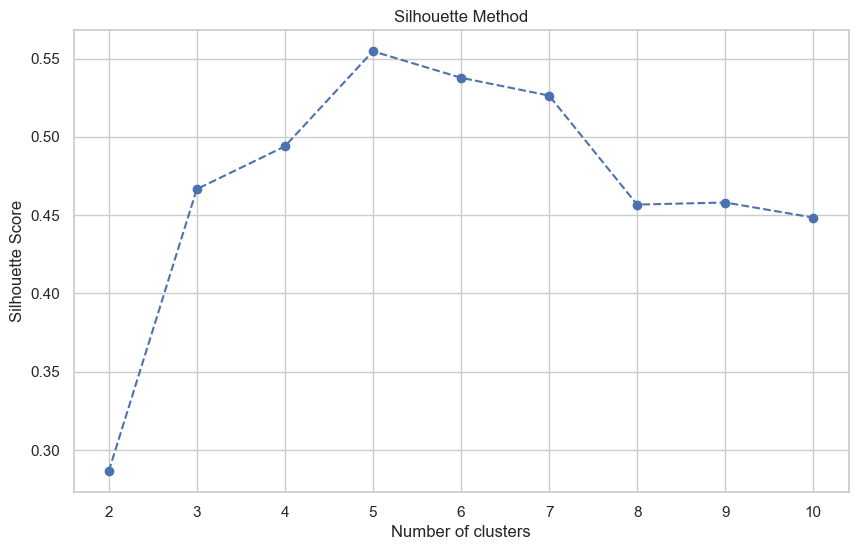

In [21]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [27]:
# Define the number of clusters
K = 5

# Initialize the KMeans model
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=100, random_state=0)

# Fit the model to the standardized data
kmeans.fit(X_scaled)


KMeans(n_clusters=5, n_init=100, random_state=0)

In [28]:
# Predict the cluster for each data point
labels = kmeans.predict(X_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = labels

# Display the first few rows of the dataframe with cluster labels
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


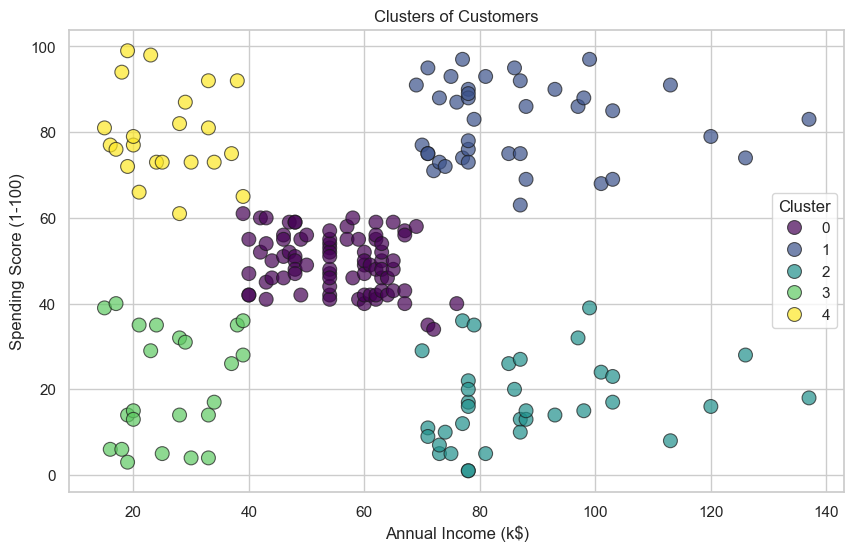

In [29]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7, edgecolor='k')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [14]:


# Save the K-Means model
joblib.dump(kmeans, 'kmeans_model.pkl')

# Save the clustered data to a new CSV file
df.to_csv('clustered_data.csv', index=False)

print("Model and clustered data saved successfully.")

Model and clustered data saved successfully.


In [30]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5546571631111091
